In [3]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


<h2>ConvNet 3X3</h2>

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 52s 864us/step - loss: 0.3149 - acc: 0.9011 - val_loss: 0.0703 - val_acc: 0.9767
Epoch 2/12
60000/60000 [==============================] - 51s 848us/step - loss: 0.1051 - acc: 0.9685 - val_loss: 0.0468 - val_acc: 0.9848
Epoch 3/12
60000/60000 [==============================] - 51s 850us/step - loss: 0.0779 - acc: 0.9765 - val_loss: 0.0347 - val_acc: 0.9876
Epoch 4/12
60000/60000 [==============================] - 52s 867us/step - loss: 0.0666 - acc: 0.9799 - val_loss: 0.0304 - val_acc: 0.9898
Epoch 5/12
60000/60000 [==============================] - 51s 851us/step - loss: 0.0585 - acc: 0.9821 - val_loss: 0.0280 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 51s 845us/step - loss: 0.0533 - acc: 0.9842 - val_loss: 0.0282 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 51s 845us/step - loss: 0.0465 - acc: 0.9866 - val_loss: 0.

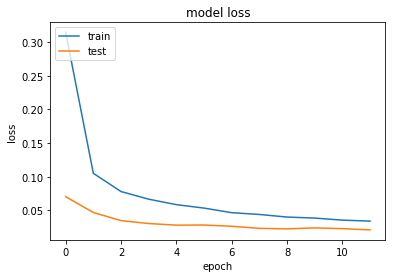

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Observations:</h2>


*   we can see that validation loss and train loss almost parallel means model is not overfitting.



<h2>ConvNet 5X5</h2>

In [9]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())



model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0730 18:11:10.088495 140420683405184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 39s 650us/step - loss: 0.3118 - acc: 0.9045 - val_loss: 0.0569 - val_acc: 0.9822
Epoch 2/12
60000/60000 [==============================] - 38s 641us/step - loss: 0.1218 - acc: 0.9636 - val_loss: 0.0447 - val_acc: 0.9858
Epoch 3/12
60000/60000 [==============================] - 39s 643us/step - loss: 0.0965 - acc: 0.9718 - val_loss: 0.0406 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 38s 638us/step - loss: 0.0762 - acc: 0.9775 - val_loss: 0.0353 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 38s 640us/step - loss: 0.0671 - acc: 0.9802 - val_loss: 0.0372 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 38s 634us/step - loss: 0.0608 - acc: 0.9816 - val_loss: 0.0408 - val_acc: 0.9889
Epoch 7/12
60000/60000 [==============================] - 39s 644us/step - loss: 0.0566 - acc: 0.9827 - val_loss: 0.

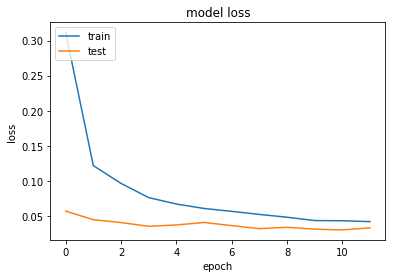

In [11]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Observations:</h2>


*   we can see that validation loss and train loss almost parallel means model is not overfitting.


<h2>ConvNet  2X2</h2>

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(BatchNormalization())

model.add(Conv2D(40, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(BatchNormalization())

model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history2=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 516s 9ms/step - loss: 0.3469 - acc: 0.9336 - val_loss: 0.1174 - val_acc: 0.9759
Epoch 2/12
60000/60000 [==============================] - 524s 9ms/step - loss: 0.0806 - acc: 0.9790 - val_loss: 0.0665 - val_acc: 0.9831
Epoch 3/12
60000/60000 [==============================] - 517s 9ms/step - loss: 0.0431 - acc: 0.9882 - val_loss: 0.0733 - val_acc: 0.9836
Epoch 4/12
60000/60000 [==============================] - 508s 8ms/step - loss: 0.0286 - acc: 0.9918 - val_loss: 0.0795 - val_acc: 0.9836
Epoch 5/12
60000/60000 [==============================] - 506s 8ms/step - loss: 0.0191 - acc: 0.9945 - val_loss: 0.1101 - val_acc: 0.9831
Epoch 6/12
60000/60000 [==============================] - 511s 9ms/step - loss: 0.0165 - acc: 0.9956 - val_loss: 0.0485 - val_acc: 0.9876
Epoch 7/12
60000/60000 [==============================] - 507s 8ms/step - loss: 0.0107 - acc: 0.9971 - val_loss: 0.1258 - 

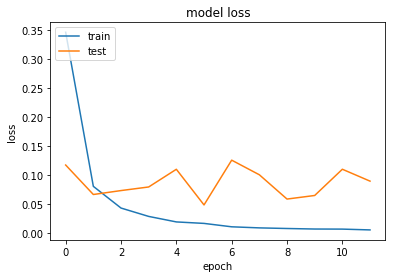

In [13]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Observation</h2>


*   there is more loss during test data then train data.



In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(40, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history3=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.3442 - acc: 0.8890 - val_loss: 0.0856 - val_acc: 0.9730
Epoch 2/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1224 - acc: 0.9605 - val_loss: 0.0574 - val_acc: 0.9814
Epoch 3/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0921 - acc: 0.9709 - val_loss: 0.0471 - val_acc: 0.9844
Epoch 4/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0759 - acc: 0.9759 - val_loss: 0.0428 - val_acc: 0.9866
Epoch 5/12
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0679 - acc: 0.9784 - val_loss: 0.0412 - val_acc: 0.9883
Epoch 6/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0610 - acc: 0.9810 - val_loss: 0.0343 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0543 - acc: 0.9823 - val_loss: 0.0336 - val_acc

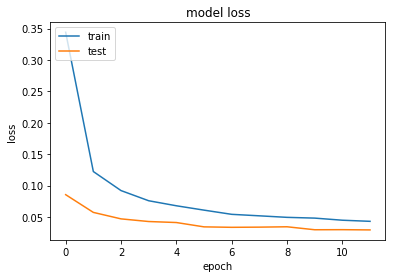

In [15]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Observations</h2>


*   There is no much difference in the test and the train loss



In [0]:
from prettytable import PrettyTable
b = PrettyTable()
b.field_names = ["Layers", "Accuracy"]
b.add_row(["3X3 hidden layers",0.9927])
b.add_row(["5X5 hidden layers",0.9911])
b.add_row(["2X2 hidden layers", 0.9909])
print(b)

+-------------------+----------+
|       Layers      | Accuracy |
+-------------------+----------+
| 3X3 hidden layers |  0.9927  |
| 5X5 hidden layers |  0.9911  |
| 2X2 hidden layers |  0.9909  |
+-------------------+----------+


<h2>Observations</h2>


*   As hidden laryes increases then it will take more time to compute.
*   if we keep maxpooling very less then it will takes more time to compute.

